<a href="https://colab.research.google.com/github/GUGUGANG/IS_4487_Tokyo/blob/main/Hanson_Gu_day3_lab_retailer_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 3 Lab, IS 4487

Outline

Repeat exercises from Lab 2, for practice, but with the *SuperStore Retail Orders* dataset

- Loading installed packages
- Inspect data
- Clean data
- Summarize data
- Explore plot types and search for insights

Please use the Gemini AI tool to get coding ideas.



# Notebook Instructions
- Remember to save a copy of the notebook in Drive so that you can save your changes.
- Complete the Assignment Tasks.
- When you are done revising this notebook save your changes to GitHub and upload the URL for the file to Canvas for the assignment.
- Some of these assignments ask you to do things we have not covered yet.  Use AI to come up with a solution.

# Load Libraries

➡️ Assignment Tasks
- Load Pandas

In [96]:
# your code goes here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [53]:
ss = pd.read_csv("https://raw.githubusercontent.com/jefftwebb/is_4487_base/main/Labs/DataSets/superstore_retail_orders.csv")

# Summarize and Review Data

➡️ Assignment Tasks

- Describe or profile the dataframe

In [77]:
# Your code goes here
ss.describe()


,order_id,quantity,product_price,total_purchase
count,56045.000000,56006.000000,56045.000000,5.600600e+04
mean,61668.066340,3.348498,6195.540505,1.190250e+04
std,7508.229651,422.646565,35784.727716,7.481388e+04
min,45079.000000,1.000000,2.290000,2.290000e+00
25%,55644.000000,1.000000,7.950000,1.497000e+01
50%,61869.000000,1.000000,475.600000,4.756000e+02
75%,68097.000000,2.000000,914.620000,1.199000e+03
max,74147.000000,100000.000000,235481.000000,2.024994e+06


In [55]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [56]:
ss.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99


# Prepare Data

➡️ Assignment Tasks
- Remove rows with empty (NULL) values
- Locate outliers in any of the variables.   Filter them out if they appear to be mistakes; keep them if they are exceptional cases.
- Create a new field: total_purchase. This should be product_price x quantity.

In [58]:
# Drop NAs
ss_cleaned = ss.dropna()
print(ss_cleaned.isnull())

       order_id  order_date  order_year_month  customer_name   city  \
0         False       False             False          False  False   
1         False       False             False          False  False   
2         False       False             False          False  False   
3         False       False             False          False  False   
4         False       False             False          False  False   
...         ...         ...               ...            ...    ...   
56040     False       False             False          False  False   
56041     False       False             False          False  False   
56042     False       False             False          False  False   
56043     False       False             False          False  False   
56044     False       False             False          False  False   

       state_province  quantity  product_name  product_line  product_price  
0               False     False         False         False          F

In [80]:
# Search for and filter outliers
ss_filtered = ss_filtered[ss_filtered['product_price'] <20000]
print(ss_filtered)

       order_id  order_date order_year_month     customer_name  \
0         51188  2021-07-01          2021-07     Audrey Blanco   
3         51241  2021-07-04          2021-07        Alexa Bell   
4         51297  2021-07-08          2021-07        Casey Diaz   
5         51319  2021-07-09          2021-07    Troy Rodriguez   
6         51357  2021-07-11          2021-07  Natalie Phillips   
...         ...         ...              ...               ...   
56040     74084  2022-06-29          2022-06        Ian Rogers   
56041     74062  2022-06-29          2022-06   Marcus Anderson   
56042     74065  2022-06-29          2022-06  Nathaniel Howard   
56043     74038  2022-06-29          2022-06        Robin Sanz   
56044     74110  2022-06-30          2022-06   Mallory Jimenez   

                    city             state_province  quantity  \
0      North Cherylmouth  NEW HAMPSHIRE                   3.0   
3         Lake Tracytown  WISCONSIN                       1.0   
4           

In [69]:
# create total_purchase
ss['total_purchase'] = ss['quantity'] * ss['product_price']
print(ss.head())



   order_id  order_date order_year_month  customer_name               city  \
0     51188  2021-07-01          2021-07  Audrey Blanco  North Cherylmouth   
1     51187  2021-07-01          2021-07    Isaac Allen         Traceyland   
2     51199  2021-07-02          2021-07     Ian Morgan          Dylanberg   
3     51241  2021-07-04          2021-07     Alexa Bell     Lake Tracytown   
4     51297  2021-07-08          2021-07     Casey Diaz        Byrdchester   

              state_province  quantity  \
0  NEW HAMPSHIRE                   3.0   
1  WEST VIRGINIA                   4.0   
2  SOUTH DAKOTA                    5.0   
3  WISCONSIN                       1.0   
4  MISSISSIPPI                     1.0   

                                        product_name product_line  \
0  Apple iPhone XR (Yellow, 256 GB) (Includes Ear...       Mobile   
1  Apple iPhone XR (Yellow, 256 GB) (Includes Ear...       Mobile   
2  Apple iPhone XR (Yellow, 256 GB) (Includes Ear...       Mobile   
3 

Check that your cleaning worked

In [61]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
 10  total_purchase    56006 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.7+ MB


In [81]:
ss_filtered.describe()

,order_id,quantity,product_price,total_purchase
count,52014.000000,51977.000000,52014.000000,51977.000000
mean,62003.466682,1.515574,498.496061,573.375782
std,7209.320056,0.614985,645.750749,706.365244
min,45080.000000,1.000000,2.290000,2.290000
25%,56012.000000,1.000000,4.990000,11.970000
50%,62102.000000,1.000000,69.990000,69.990000
75%,68196.750000,2.000000,693.440000,926.710000
max,74147.000000,3.000000,2249.100000,2378.040000


# Summarize Data

➡️ Assignment Tasks
- Calculate the average price per year-month
- Calculate the total revenue per year month

Does more cleaning need to be done? If so, do it and then recreate the above summary tables.

In [82]:
# average price
average_price_per_year_month = ss.groupby('order_year_month')['product_price'].mean()
print(average_price_per_year_month)



order_year_month
1922-06    8550.073390
2020-01    3172.420978
2020-02    3217.667212
2020-03    3242.706768
2020-04    3194.646275
2020-05    3192.571359
2020-06    3151.209623
2020-07    1959.974251
2020-08    1921.246151
2020-09    1740.987143
2020-10    1800.830762
2020-11    1693.386178
2020-12    1716.205675
2021-01    1774.621612
2021-02    1763.226404
2021-03    1761.580940
2021-04    1691.161107
2021-05    1643.897690
2021-06    1696.822340
2021-07    4284.421507
2021-08    6573.423124
2021-09    7086.669690
2021-10    6647.267347
2021-11    6727.223221
2021-12    6001.624570
2022-01    6537.449793
2022-02    6805.364523
2022-03    5851.014440
2022-04    6467.757094
2022-05    7108.572205
2022-06    6955.332040
2029-06       3.640000
2029-07    3263.188118
2029-08       6.656667
2421-09     490.580727
Name: product_price, dtype: float64


In [86]:
filtered_data = average_price_per_year_month[average_price_per_year_month.index.str.startswith('20')]
print(filtered_data)



order_year_month
2020-01    3172.420978
2020-02    3217.667212
2020-03    3242.706768
2020-04    3194.646275
2020-05    3192.571359
2020-06    3151.209623
2020-07    1959.974251
2020-08    1921.246151
2020-09    1740.987143
2020-10    1800.830762
2020-11    1693.386178
2020-12    1716.205675
2021-01    1774.621612
2021-02    1763.226404
2021-03    1761.580940
2021-04    1691.161107
2021-05    1643.897690
2021-06    1696.822340
2021-07    4284.421507
2021-08    6573.423124
2021-09    7086.669690
2021-10    6647.267347
2021-11    6727.223221
2021-12    6001.624570
2022-01    6537.449793
2022-02    6805.364523
2022-03    5851.014440
2022-04    6467.757094
2022-05    7108.572205
2022-06    6955.332040
2029-06       3.640000
2029-07    3263.188118
2029-08       6.656667
Name: product_price, dtype: float64


In [90]:
# total revenue
total_revenue_per_year_month = ss.groupby('order_year_month')['total_purchase'].sum()
filtered_total_revenue = total_revenue_per_year_month[total_revenue_per_year_month.index.str.startswith('20')]

print(filtered_total_revenue)




order_year_month
2020-01     4745149.93
2020-02      530915.09
2020-03      710043.07
2020-04      651707.84
2020-05      657669.70
2020-06      668056.44
2020-07      484113.64
2020-08      534106.43
2020-09      341233.48
2020-10      401585.26
2020-11      323436.76
2020-12      559483.05
2021-01      429458.43
2021-02      470781.45
2021-03      468580.53
2021-04      488745.56
2021-05      540842.34
2021-06      529408.57
2021-07    10495978.77
2021-08    47239239.96
2021-09    50625473.56
2021-10    53123132.48
2021-11    50213508.07
2021-12    60364261.25
2022-01    58216747.14
2022-02    58175468.30
2022-03    57460161.50
2022-04    63217187.94
2022-05    73964841.92
2022-06    67965140.91
2029-06          19.55
2029-07      517358.82
2029-08          39.94
Name: total_purchase, dtype: float64


# Plot Data

➡️ Assignment Tasks
- Produce two plots that show patterns or relationships in the data.
- Interpret these patterns for potential value to the business.  

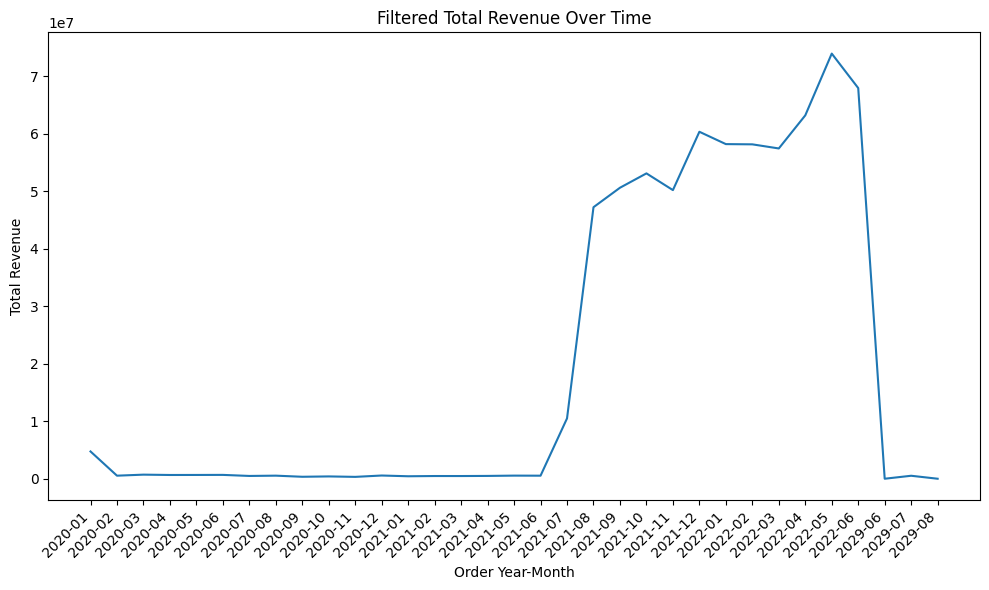

In [100]:
# Your code goes here.  Plot 1 We can see overtime that revenue has spiked during 2021-05 to 2022-06.
#This means that this could be revenue seasonality or randomness. We also see that it completely crashes down at the end
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(filtered_total_revenue.index, filtered_total_revenue.values)
plt.xlabel('Order Year-Month')
plt.ylabel('Total Revenue')
plt.title('Filtered Total Revenue Over Time')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

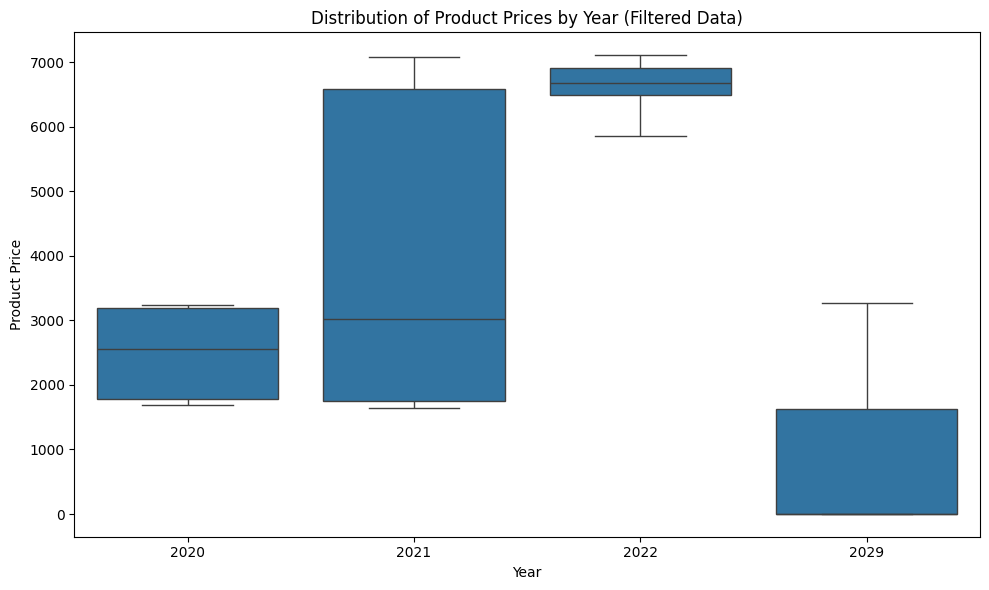

In [99]:
# Your code goes here.  Plot 2
#The box plot visualizes the distribution of product_price by year.
# we can see the .25, .5, and .75 quartiles. We  that 2021 has the wides range of data.
.
filtered_df = filtered_data.reset_index()
filtered_df.columns = ['Order Year-Month', 'product_price']

# Extract year from the 'Order Year-Month' column
filtered_df['Year'] = pd.to_datetime(filtered_df['Order Year-Month']).dt.year

plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='product_price', data=filtered_df)
plt.xlabel('Year')
plt.ylabel('Product Price')
plt.title('Distribution of Product Prices by Year (Filtered Data)')
plt.xticks(rotation=0)  # No rotation needed for years
plt.tight_layout()
plt.show()

Make an interpretive comment.